<a href="https://colab.research.google.com/github/ybeth-gonzaga/Taylor-Swift-Spotify-Analysis/blob/main/02_summary_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Import File
df = pd.read_csv("https://raw.githubusercontent.com/ybeth-gonzaga/Taylor-Swift-Spotify-Analysis/main/ph_spotify_daily_charts_ts_summary.csv")
df.head()

,Unnamed: 0,date,total_streams,stream_percent_change,total_count,count_percent_change,highest_rank,top_rank_diff
0,0,2017-01-01,0,0.0,0,0.0,NaN,0.0
1,1,2017-01-02,0,0.0,0,0.0,NaN,0.0
2,2,2017-01-03,0,0.0,0,0.0,NaN,0.0
3,3,2017-01-04,0,0.0,0,0.0,NaN,0.0
4,4,2017-01-05,0,0.0,0,0.0,NaN,0.0


# Initial Check of Dataframe

In [ ]:
# Number of rows and columns
df.shape

(2479, 8)

In [ ]:
# Get the name of the columns
df.keys()

Index(['Unnamed: 0', 'date', 'total_streams', 'stream_percent_change',
       'total_count', 'count_percent_change', 'highest_rank', 'top_rank_diff'],
      dtype='object')

In [ ]:
# Check the basic info of the values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2479 non-null   int64  
 1   date                   2479 non-null   object 
 2   total_streams          2479 non-null   int64  
 3   stream_percent_change  2479 non-null   float64
 4   total_count            2479 non-null   int64  
 5   count_percent_change   2479 non-null   float64
 6   highest_rank           1976 non-null   float64
 7   top_rank_diff          2479 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 155.1+ KB


In [ ]:
# Convert data type of date to date
df['date_time'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             2479 non-null   int64         
 1   date                   2479 non-null   object        
 2   total_streams          2479 non-null   int64         
 3   stream_percent_change  2479 non-null   float64       
 4   total_count            2479 non-null   int64         
 5   count_percent_change   2479 non-null   float64       
 6   highest_rank           1976 non-null   float64       
 7   top_rank_diff          2479 non-null   float64       
 8   date_time              2479 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 174.4+ KB


# Initial Data Analysis

In [ ]:
# Getting the date range
print('The data ranges from',df['date'].min(),'to',df['date'].max())

The data ranges from 2017-01-01 to 2023-10-15


## Count of Songs in the Ph Top 200

In [ ]:
# Check if there are empty cells
df['total_count'].isnull().any()

False

In [ ]:
# Check what are unique values of the column
df['total_count'].value_counts()

total_count
0     503
4     294
1     214
2     195
5     185
3     185
8      89
7      70
15     64
6      58
19     55
14     36
11     34
18     33
25     32
24     30
20     30
13     29
23     28
22     27
26     26
12     23
29     22
30     21
27     18
9      17
16     17
21     15
10     14
31     14
28     13
17     11
34     10
38      9
33      9
32      8
35      7
36      6
42      3
44      3
45      2
52      2
53      2
49      2
48      2
46      2
37      2
39      2
47      1
43      1
56      1
51      1
50      1
40      1
Name: count, dtype: int64

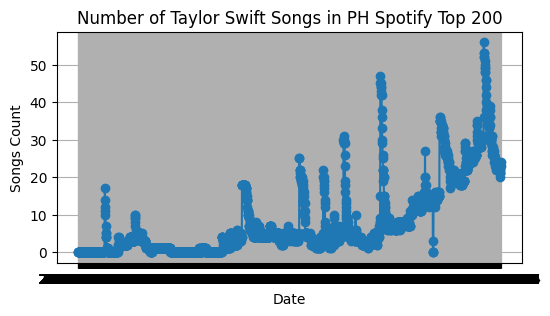

In [ ]:
# Line: Date, plt, Count
plt.figure(figsize=(6,3))
plt.plot(df['date'], df['total_count'], marker='o', linestyle='-')
plt.title('Number of Taylor Swift Songs in PH Spotify Top 200')
plt.xlabel('Date')
plt.ylabel('Songs Count')
plt.grid(True)
plt.show()

# Problems:
# graph has a grey background
# x axis is blacked out

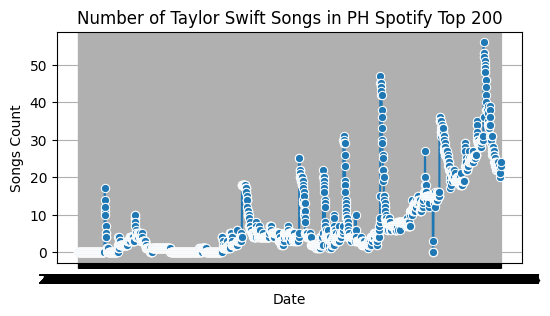

In [ ]:
# Line: Date, sns, Count
plt.figure(figsize=(6,3))
sns.lineplot(data=df, x='date', y='total_count', marker='o')
plt.title('Number of Taylor Swift Songs in PH Spotify Top 200')
plt.xlabel('Date')
plt.ylabel('Songs Count')
plt.grid(True)
plt.show()

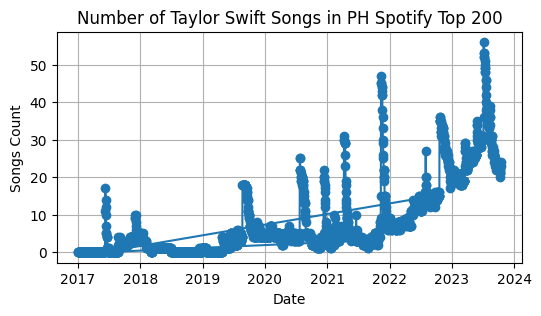

In [ ]:
# Line: Datetime, plt, Count
plt.figure(figsize=(6,3))
plt.plot(df['date_time'], df['total_count'], marker='o', linestyle='-')
plt.title('Number of Taylor Swift Songs in PH Spotify Top 200')
plt.xlabel('Date')
plt.ylabel('Songs Count')
plt.grid(True)
plt.show()

# Problems:
# Weird lines going in different directions

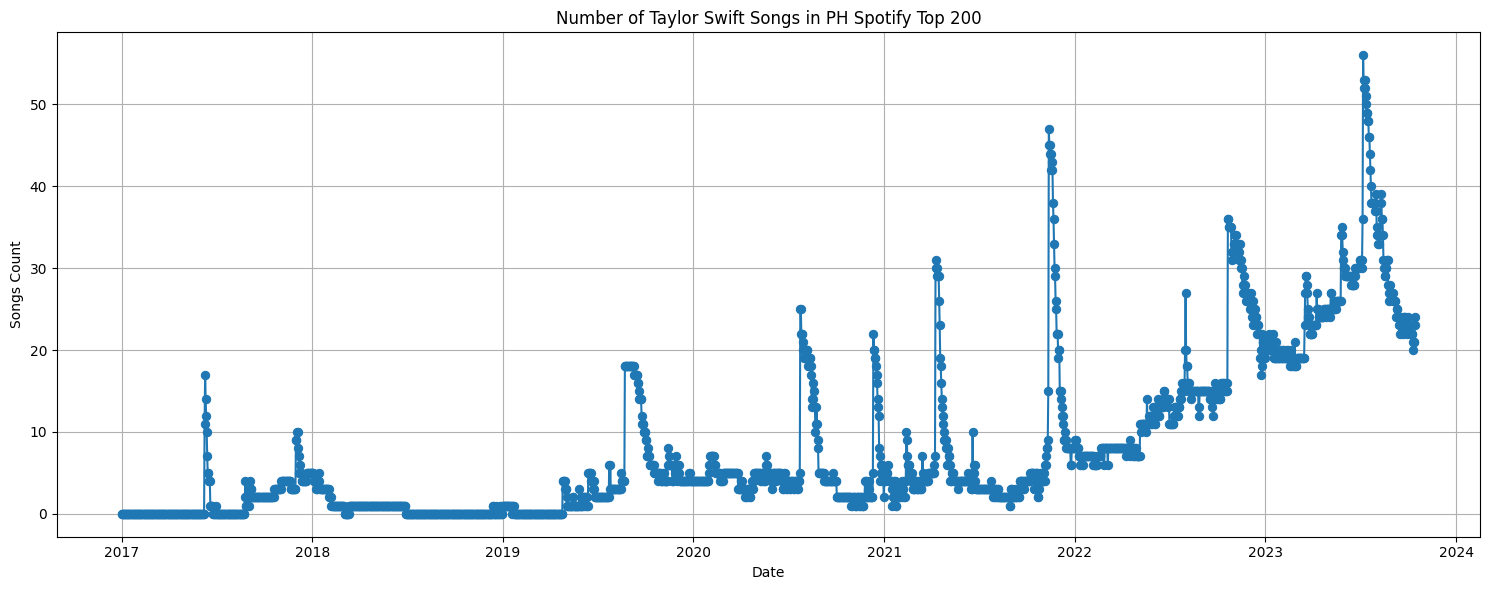

In [ ]:
# Line: Datetime, sns, Count
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='date_time', y='total_count', marker='o', markeredgecolor=None)
plt.title('Number of Taylor Swift Songs in PH Spotify Top 200')
plt.xlabel('Date')
plt.ylabel('Songs Count')
plt.tight_layout() # to prevent overlapping of marker points
plt.grid(True)
plt.show()

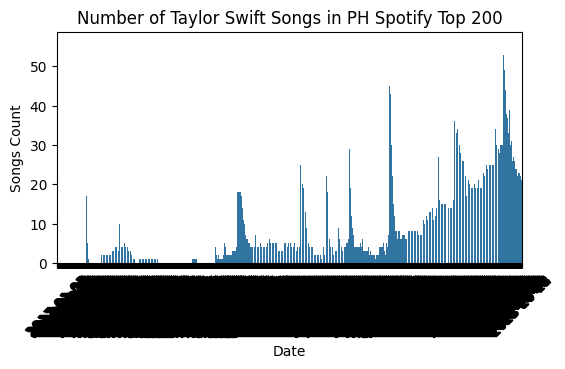

In [ ]:
# Bar: Date, sns, Count
plt.figure(figsize=(6,3))
sns.barplot(data=df, x='date', y='total_count')
plt.title('Number of Taylor Swift Songs in PH Spotify Top 200')
plt.xlabel('Date')
plt.ylabel('Songs Count')
plt.xticks(rotation=45)
plt.show()

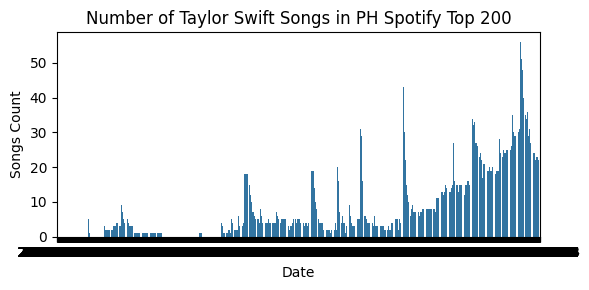

In [ ]:
# Bar: Datetime, sns, Count
plt.figure(figsize=(6,3))
sns.barplot(data=df, x='date_time', y='total_count')
plt.title('Number of Taylor Swift Songs in PH Spotify Top 200')
plt.xlabel('Date')
plt.ylabel('Songs Count')
plt.tight_layout() # to prevent overlapping of marker points
plt.show()
